#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
duplicates = df.duplicated().any()
print(duplicates)

True


Periksa apakah ada missing values

In [4]:
missing_values = df.isnull().any()
print(missing_values)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

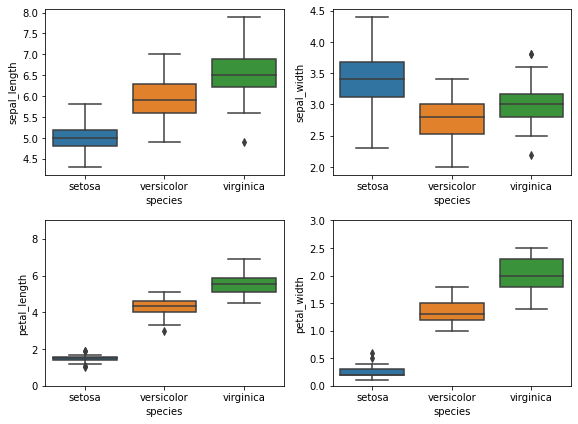

In [5]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=df)

plt.subplot(2, 2, 3)
ax = sns.boxplot(x="species", y="petal_length", data=df)
ax.set_ylim(0, 9) 

plt.subplot(2, 2, 4)
ax = sns.boxplot(x="species", y="petal_width", data=df)
ax.set_ylim(0, 3)

plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [6]:
X = df.drop("species", axis=1)
y = df["species"]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print('Ukuran train set:', len(X_train))
print('Ukuran test set:', len(X_test))

Ukuran train set: 135
Ukuran test set: 15


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaling = scaler.fit_transform(X_train)
X_test_scaling = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [9]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train_scaling, y_train)

LogisticRegression()

Uji model dengan dataset test

In [10]:
y_pred_logisticreg = logisticreg .predict(X_test_scaling)
print(y_pred_logisticreg)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_logisticreg)
print("Confusion Matrix\n", cm)

accuracy_logisticreg = accuracy_score(y_test, y_pred_logisticreg)
accuracy_logisticreg = '{:,.6f}'.format(accuracy_logisticreg)
print("Accuracy score",accuracy_logisticreg)


Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy score 1.000000


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [12]:
model = GaussianNB()
print(model)

GaussianNB()


Uji hasil model dengan data test

In [20]:
model.fit(X_train_scaling, y_train)
y_pred_nb = model.predict(X_test_scaling)

print(y_pred_nb)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [21]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred_nb)
print("Confusion Matrix\n", cm)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb= '{:,.6f}'.format(accuracy_nb)
print("Accuracy score",accuracy_nb)

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 1 3]]
Accuracy score 0.933333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(metric='euclidean')
knn_model.fit(X_train_scaling, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [16]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaling, y_train)
y_pred_knn = knn_model.predict(X_test_scaling)

print(y_pred_knn)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [18]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred_knn)
print("Confusion Matrix\n", cm)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn = '{:,.6f}'.format(accuracy_knn)
print("Accuracy score",accuracy_knn)

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy score 1.000000


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [22]:
print("Accuracy Score Logistic Regression :", accuracy_logisticreg)
print("Accuracy Score Naives Bayes :", accuracy_nb)
print("Accuracy Score K-NN Classifier :", accuracy_knn)

Accuracy Score Logistic Regression : 1.000000
Accuracy Score Naives Bayes : 0.933333
Accuracy Score K-NN Classifier : 1.000000
